<center>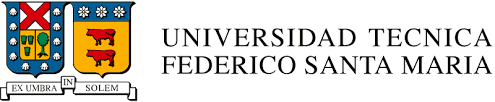</center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477/577 Redes Neuronales Artificiales - 2022-2 </h1>

<H3 align='center'> Tarea 3  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Clasificación de Sentimiento de Reviews de peliculas
 * Logistic regression y Naive Bayes
 * Una red neuronal feedforward
 * Una red neuronal recurrente (simple y LSTM).
 * Una red neuronal recurrente con embedding GLOVE (avanzado).
* AutoEncoders (AE)
 * AutoEncoder Convolutcional
 * Denoising AutoEncoders (DAE)
 * Detección de anomalías


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<maryon.morales@sansano.usm.cl>, <sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-395/477/577-2022-2 Tarea 3]. Invitar como colaborador a los usuarios de github "ssanchezl" y "maryonmorales" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 09 de Diciembre, en horario de clases.
* Fecha de entrega: 10 de Diciembre. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier análisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algún modelo se demora demasiado en correr en su máquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las máquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. Existe también la posibilidad de utilizar _Google Cloud Plataform_ o _Amazon Web Service_, donde tienen máquinas aceleradas con GPU; maquinas ya configuradas para _deep leraning_ pueden encontrarse en el _Marketplace_ de cada proveedor de servicios.

# 1.- Clasificación de sentimientos

En esta tarea realizaremos clasificación de sentimientos sobre reviews de [IMDB](https://www.imdb.com/). Utilizaremos los modelos:

* Logistic regression y Naive Bayes
* Una red neuronal feedforward
* Una red neuronal recurrente (simple y LSTM).
* Una red neuronal recurrente con embedding GLOVE.
 
Su trabajo será implementar cada uno de los modelos y estudiar las performance de cada modelo.

Primero, carguemos en memoria el conjunto de datos y veamos algunos de sus datos. ¿Qué puede decir de la base de datos?, ¿Es una tarea sencilla de realizar para una persona?, ¿Le parece que los datos de entrenamiento y de test están bien balanceados?

In [23]:

import os
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import pickle
from tensorflow.keras.datasets.imdb import load_data, text_to_word_sequence

data = load_data(num_words=10000)

classes = ['negative', 'positive']
(X_train, y_train), (X_test, y_test) = data


ImportError: cannot import name 'text_to_word_sequence'

In [22]:
print_n = 1
for k in range(print_n):
    print('Sentiment: {0}'.format(classes[y_train[k]]))
    print('Text: ')
    print(X_train[k])     

Sentiment: positive
Text: 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [21]:
import pandas as pd
print(pd.Index(y_train).value_counts())
print(pd.Index(y_test).value_counts())

1    12500
0    12500
dtype: int64
1    12500
0    12500
dtype: int64


## 1.a - Modelos clásicos y representación de datos

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

En esta sección preprocese el texto, para esto utilice las clases CountVectorizer y TfidfVectorizer debe obtener dos representaciones vectoriales (bag of words y tf-idf) para cada uno de los ejemplos del dataset.

In [ ]:
vectorizer_bgw = CountVectorizer()
vectorizer_tf = TfidfVectorizer()

# Vectorizar datos de entrenamiento con ambos metodos

# Bag of words
vectorizer_bgw.fit(X_train)

# Matriz Tf-idf
vectorizer_tf.fit(X_train)

X_train_bgw = vectorizer_bgw.transform(X_train)
X_train_tf = vectorizer_tf.transform(X_train)

X_test_bgw = vectorizer_bgw.transform(X_test)
X_test_tf = vectorizer_tf.transform(X_test)
#####################################################

print("Atributos CountVectorizer: ", X_train_bgw.shape[1])
print("Atributos TfidfVectorizer: ", X_train_tf.shape[1])

CountVectorizer realiza un conteo por palabra->token utilizando el vocabulario obtenido con fit. 

El objetivo de utilizar tf-idf en lugar de las frecuencias brutas de ocurrencia de una palabra en un documento determinado es reducir el impacto de las palabras que se producen con mucha frecuencia en un corpus determinado y que, por lo tanto, empíricamente son menos informativas que las características que se producen en una pequeña fracción del corpus de formación. La formula para calcular la matriz tf-idf es:

$$\text{tf-idf}(t, d) = \text{tf}(t, d) \cdotp \text{idf}(t)$$

Donde $\text{tf}(t,d)$ es la ocurrencia de un termino $t$ en un documento $d$.

$$\text{idf}(t) = \log [ (1 + n) / (1 + df(t)) ] + 1$$

Donde $df(t)$ es el número de documentos del conjunto de documentos que contienen el término t.

Por lo tanto TfidfVectorizer es simplemente aplicar la transformación Tf-idf al CountVectorizer.

## 1.b - Logistic regression y Naive Bayes
En esta sección entrene los modelos MultinomialNB y LogisticRegression en los datos preprocesados obtenidos anteriormente, utilizando ambas representaciones cuando sea posible (es decir, para LR y NB tendrá que entrenar dos modelos por ejemplo, uno para cada representación). ¿Cuáles son las principales características y parámetros de cada modelo?, ¿Qué significa que los datos sean o no sean linealmente separables?.

In [ ]:
def modelo(clf, X_train, y_train, X_test, y_test):

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return y_pred, classification_report(y_test, y_pred)
   

plt.rcParams["figure.figsize"]=[16,8]

clf = [LogisticRegression(max_iter=10000), MultinomialNB(), None, None]
datos = ['Bag of words', 'TF-IDF']
models = ['LogisticRegression', 'MultinomialNB']
tr_sets = [X_train_bgw, X_train_tf]
test_sets = [X_test_bgw, X_test_tf]
reportes = list()

k=1
for cl in range(len(clf)):
                      
    y_pred, reporte = modelo(clf[int(cl/2)], tr_sets[int(cl%2)], y_train, test_sets[int(cl%2)], y_test) 
    
    reportes.append(reporte)       
    
    ax = plt.subplot(1,4,k)

    sns.heatmap(np.around(confusion_matrix(y_test, y_pred), decimals=2), robust=True, linewidths=0.1, square=True,annot=True,cmap='jet',linecolor="white", ax=ax, cbar=True);
    ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class');False
    ax.set_title(f'{datos[int(cl%2)]} modelo {models[int(cl/2)]}');

    plt.tight_layout()
    plt.grid()
    if k==4:
        k=1
        plt.show()
    else:
        k+=1

for r in range(len(reportes)):
    print(f"\n################# Modelo {models[int(r/2)]} {datos[int(r%2)]} #################\n")
    print(reportes[r])
    print(f"###################################################")

¿Qué representación es mejor en cada modelo?

## 1.c - Modelos de redes neuronales

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Embedding, LSTM, SimpleRNN, Add, Lambda, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [ ]:
# Definición de parámetros
batch_size = 32
epochs = 2
num_classes = 1 # Positivo o negativo, pero para la capa de salida es 1 neurona sigmoide
max_words = 70
embedding_size = 30

### Preprocesamiento
A continuación preprocesaremos los datos, realizando tokenización.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenizing text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train + X_test)
word_index = tokenizer.word_index
num_words = len(tokenizer.word_index) + 1

In [ ]:
# Transformando texto a secuencias de indices
X_tr = tokenizer.texts_to_sequences(X_train)
X_te = tokenizer.texts_to_sequences(X_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Se agregan 0 a textos que tienen menos de max_words palabras y se cortan los que tienen mas
X_tr_pad = pad_sequences(X_tr, maxlen=max_words)
X_te_pad = pad_sequences(X_te, maxlen=max_words)

# Se convierten label a version categorica
y_trainc = to_categorical(y_train, num_classes=num_classes)
y_testc = to_categorical(y_test, num_classes=num_classes)

## 1.d -  Red Neuronal FeedFordward

Primero entrenaremos una red neuronal feedforward directamente en el texto tokenizado, utilizando un embedding simple.

In [ ]:
document_input = Input(shape=(max_words, ), dtype='int32')
# Embedding Layer
embedding = Embedding(input_dim=num_words, output_dim=embedding_size, 
                      input_length=max_words, 
                      trainable=True)(document_input)
# Sumando los embedding
embedding = Lambda(lambda x: K.sum(x, axis=1), 
                   output_shape=(embedding_size,))(embedding)
# Aplicando una capa densa en la suma
dense = Dense(20, activation='relu')(embedding)

output = Dense(num_classes, activation='sigmoid')(dense)

# Construyendo el modelo
model = Model(inputs=[document_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(X_tr_pad, y_trainc,
                  batch_size=batch_size,
                  epochs=...,
                  verbose=1,
                  validation_split=0.2)

In [ ]:
loss, acc = model.evaluate(X_te_pad, y_testc)
print('Accuracy en datos de test: {0}'.format(acc))

### Red Neuronal Recurrente Simple con Embedding

Explique cómo funcionan las redes recurrentes e investigue qué es y cómo usar el embedding y la librería `SimpleRNN`.

Reemplace la suma de embedding y la capa densa por una red SimpleRNN con 10 unidades, utilice return_sequence=False.

In [ ]:
document_input = Input(shape=(max_words, ), dtype='int32')
# Embedding Layer
embedding = Embedding(input_dim=num_words, output_dim=embedding_size, 
                      input_length=max_words, 
                      trainable=True)(document_input)


'''  ----- Aqui va su código ------'''



'''  -----------  '''

rnn = SimpleRNN(units=10, activation='tanh', return_sequences=False)(embedding)

# Aplicando una capa densa luego de la RNN
output = Dense(num_classes, activation='sigmoid')(rnn)

# Construyendo el modelo
model = Model(inputs=[document_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(X_tr_pad, y_trainc,
                  batch_size=batch_size,
                  epochs=...,
                  verbose=1,
                  validation_split=0.2)

In [ ]:
loss, acc = model.evaluate(X_te_pad, y_testc)
print('Accuracy en datos de test: {0}'.format(acc))

### Dropout

Aplique un dropout de 0.4 luego de la capa RNN para evitar el sobre ajuste. Averigue sobre Dropout y explique como funciona en este tipo de redes.

In [ ]:
document_input = Input(shape=(max_words, ), dtype='int32')
# Embedding Layer
embedding = Embedding(input_dim=num_words, output_dim=embedding_size, 
                      input_length=max_words, 
                      trainable=True)(document_input)


'''  ----- Aqui va su código ------'''



'''  -----------  '''

rnn = SimpleRNN(units=10, activation='tanh', return_sequences=False, dropout=0.4)(embedding)

# Aplicando una capa densa luego de la RNN
output = Dense(num_classes, activation='sigmoid')(rnn)

# Construyendo el modelo
model = Model(inputs=[document_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(X_tr_pad, y_trainc,
                  batch_size=batch_size,
                  epochs=...,
                  verbose=1,
                  validation_split=0.2)

In [ ]:
loss, acc = model.evaluate(X_te_pad, y_testc)
print('Accuracy en datos de test: {0}'.format(acc))

## 1.e - Red LSTM con Embedding

Explique qué es y para qué tareas se utilizan las LSTM, explique para qué es cada compuerta de una neurona de este tipo.

In [ ]:
document_input = Input(shape=(max_words, ), dtype='int32')
# Embedding Layer
embedding = Embedding(input_dim=num_words, output_dim=embedding_size, 
                      input_length=max_words, 
                      trainable=True)(document_input)



'''  ----- Aqui va su código ------'''



'''  -----------  '''

rnn = LSTM(units=10, activation='tanh', return_sequences=False, dropout=0.8, recurrent_dropout=0.8)(embedding)

output = Dense(num_classes, activation='sigmoid')(rnn)

# Construyendo el modelo
model = Model(inputs=[document_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(X_tr_pad, y_trainc,
                  batch_size=batch_size,
                  epochs=...,
                  verbose=1,
                  validation_split=0.2)

In [ ]:
loss, acc = model.evaluate(X_te_pad, y_testc)
print('Accuracy en datos de test: {0}'.format(acc))

Grafique las curvas de error para los datos de entrenamiento, validación y test para el último modelo, concluya sobre estas.

In [ ]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Escriba aquí sus conclusiones.

## 1.f -  Red LSTM con GLOVE embedding

Descargue los embeddings pre entrenados desde https://nlp.stanford.edu/projects/glove/
archivo glove.6B.zip y extraiga los datos para utilizarlos en esta sección. Describa brevemente en qué consiste el embedding GLOVE, en qué casos es conveniente y cómo usarlo.

In [ ]:
# Funciones para cargar los vectores GLOVE
def glorot_uniform_np(shape):
    fan_in, fan_out = shape[0],shape[1]
    s = np.sqrt(6. / (fan_in + fan_out))
    return np.random.uniform(-s, s, size=shape)

def load_word_vectors(embeddings_index, glove_file):
    print('Indexing word vectors.')
    for line in glove_file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    glove_file.close()
    print('Found %s word vectors.' % len(embeddings_index))    



In [ ]:
# Cargando los vectores GLOVE
## LOAD PRETRAINED WORD VECTORS
GLOVE_FILE = 'glove.6B.100d.txt'
embeddings_index = {}
glove_file = open(GLOVE_FILE)
                  
load_word_vectors(embeddings_index, glove_file)   
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
embeddings_index = {}

Modifique la capa Embedding para utilizar los embedding pre-entrenados, para esto utilice el argumento embeddings_initializer con el valor Constant(embedding_matrix). Entrene con GLOVE embedding y el mejor modelo que haya obtenido hasta el momento o si desea puede probar modificandolo, por ejemplo agregando capas de LSTM, Dropout, Densa, ..., sientase libre de experimentar y mejorar sus resultados.

In [ ]:
from keras.initializers import Constant

document_input = Input(shape=(max_words, ), dtype='int32')

'''  ------------------------------------------  '''

'''  ----- Aquí va su código, sea creativo ------'''

'''  ------------------------------------------  '''

output = Dense(num_classes, activation='sigmoid')(rnn)

# Construyendo el modelo
model = Model(inputs=[document_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(X_tr_pad, y_train,
                  batch_size=batch_size,
                  epochs=3,
                  verbose=1,
                  validation_split=0.2)

In [ ]:
loss, acc = model.evaluate(X_te_pad, y_test)
print('Accuracy en datos de test: {0}'.format(acc))

Escriba aquí sus conclusiones.

# 2.-  AutoEncoders

Un autoencoder es un tipo especial de red neuronal que está entrenada para copiar su input a su output (es decir, su target es el input). 
<center>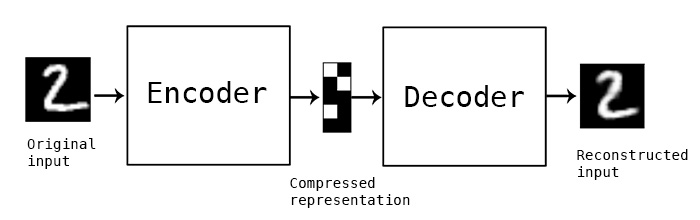

    
Por ejemplo, dada una imagen de un dígito escrito a mano, un autoencoder primero codifica la imagen en una representación latente de menor dimensión y luego decodifica la representación latente de nuevo en una imagen. Un autoencoder aprende a comprimir los datos mientras minimiza el error de reconstrucción.

A continuación se explorarán diferentes arquitecturas y usos de los autoencoder

##### a - Autoencoder básico
##### b - Denoising Autoencoder
##### c - Detección de anomalías con autoencoders

### Importar librerías

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from keras.layers import Dense
from keras.models import Sequential

### Carga de datos y breve exploración

Para los ejemplos 2.a y 2.b se utilizará el dataset Fashion MNIST, el cuál puede ser obtenido desde `keras.datasets` como se muestra a continuación.

Luego, visualice algunas imágenes de cada una de las categorías junto con sus nombres (investigue un poco para encontrar la codificación de `y`). Note que las imágenes deben representarse en blanco y negro, puede usar `cmap='Greys'`. 


In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#. . . Visualización

* ¿Qué pares de categorías cree podrían ocasionar problemas al momento de clasificación? 

* ¿Qué tan bien cree que se desempeñaría un humano en esta tarea?

## 2.a - Autoencoder básico

#### Autoencoder denso

Defina un autoencoder con dos capas densas: un `codificador` (encoder) , que comprime las imágenes en un vector latente de "d" dimensiones, y un `decodificador` (decoder), que reconstruye la imagen original a partir del espacio latente.

¿A cuál función de activación debería corresponder a la capa de salida de la red? (decoder)

Para definir su modelo, use la [API de subclases de modelos de Keras](https://www.tensorflow.org/guide/keras/custom_layers_and_models).


Pruebe tres autoencoders con d = 64, d = 324 y otro con d = dimensión original (notar que las imágenes son de 28*28)


In [ ]:
class Autoencoder(Model):
    
    def __init__(self, latent_dim):
        
        super(Autoencoder, self).__init__()
        
        self.latent_dim = latent_dim   
        
        self.encoder = tf.keras.Sequential([layers.Flatten(), layers.Dense(latent_dim, activation='relu')])
        
        self.decoder = tf.keras.Sequential([layers.Dense(784, activation=#'. . .'), layers.Reshape((28, 28))])

    def call(self, x):
        
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        
        return decoded

                                                         


In [ ]:
latent_dim = #. . .

autoencoder = Autoencoder(latent_dim) 

autoencoder.compile(#. . .)

Entrene el modelo con x_train como input y como target. El encoder aprenderá a comprimir el conjunto de datos de "d" dimensiones al espacio latente, y el decoder aprenderá a reconstruir las imágenes originales.

In [ ]:
autoencoder.fit(#X, y . . .,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0120 - val_loss: 0.0050
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - l

Ahora que ya están entrenados los modelos, pruebe codificando y decodificando las imágenes de test y luego grafique al menos 10  imágenes originales y sus correspondientes imágenes reconstruidas para cada "d", compare y comente. 

In [ ]:
encoded_imgs = #. . .
decoded_imgs = #. . .

In [ ]:
#. . .
#do it yourself

#### Deep Autoencoder

Pruebe ahora con una arquitectura ligeramente más profunda. Para esto utilice a lo menos 3 capas de encoding, es decir, 3 capas que progresivamente reduzcan la dimensionalidad de la representación hasta una dimensión objetivo inicialmente d=64. 

Utilice  igualmente a lo menos 2 capas de decoding, que se encarguen de aumentar la dimensionaliad de la representación hasta alcanzar la dimensión de la imagen original. Note que las primeras capas no necesariamente deben tener menor dimensionalidad que la imagen, la dimensión relevante es aquella de la última capa de encoding. 

Una vez esté satisfecho con su arquitectura profunda, varíe la dimensión objetivo de la última capa de encoding a d=324 y compare.

In [ ]:
#. . .
#do it yourself

#### Autoencoder Convolucional

Defina ahora, un autoencoder convolucional. La sección de encoding de la red se creará de igual manera queconvolucional cualquier red convolucional. Puede utilizar capas de Max Pooling o Strides mayores a 1 para reducir la dimensionalidad en esta etapa. Ponga atención a como varía la dimensión de la imagen a lo largo del proceso, recuerde que se quiere comprimir y descomprimir la imagen. 

Para luego recuperar la dimensionalidad de la imagen original debemos utilizar una capa llamada `Deconvolution` o [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) . 
Esta capa realiza el proceso inverso que aquel realizado por una capa convolucional, por lo cual utilizando por ejemplo `stride=2` puede duplicar la dimensionalidad de su input. 

Puede realizar la profundidad que desee, pero tome en cuenta que una mayor profundidad de la sección convolucional permite a la red reducir dimensionalidad más lentamente, sin "forzar" la compresión de las características. Note que para reconstruir la dimensión original puede usar `output_padding` para corregir problemas de paridad, entre otros. 


¡No olvide que para entrenar esta red debe usar la versión bidimensional de los datos escalados!

Visualice que tan bien se comporta la convolución, en terminos de la función de pérdida y visualizando las imágenes reconstruidas. Luego compare su resultado con la red densa.

Observe cómo se reducen las muestras de las imágenes utilizando  `.summary()` en el encoder y cómo se amplian en el decoder

## 2.b - Denoising autoencoder  

Otro uso bastante utilizado de los autoencoders, es la eliminación de ruido en las imágenes, esta tarea es de gran utilidad en campos como la medicina y astronomía.

A continuación podemos ver 3 resultados de denoising utilizando deep autoencoders.

<center>
    
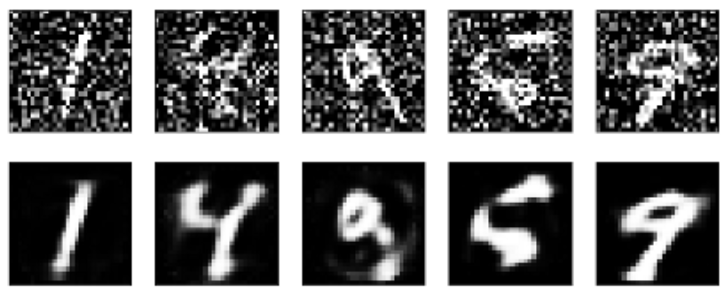
    
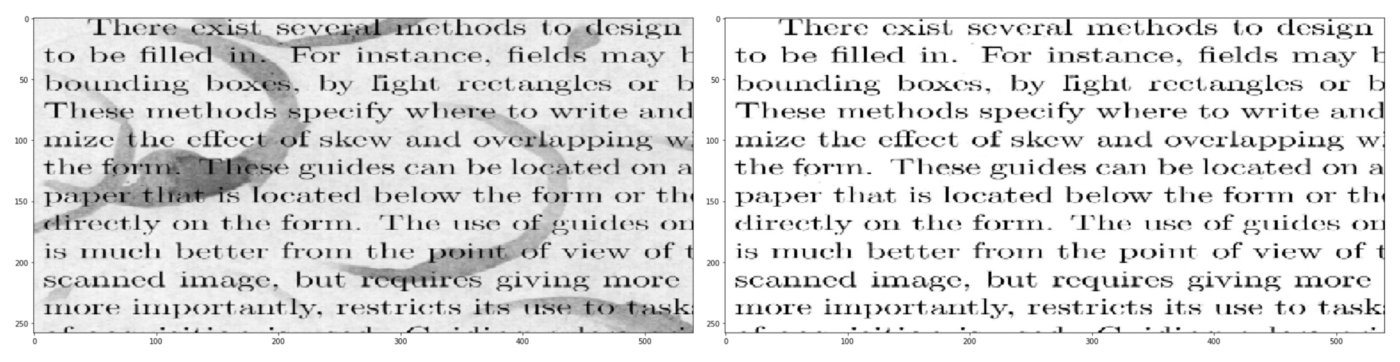

<img src="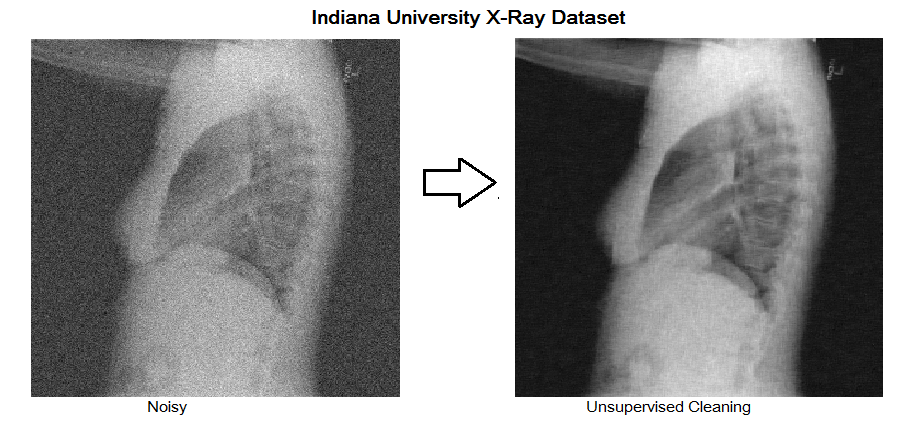 ">
<center>

Para entrenar un denoising autoencoder, la idea es similar a los modelos recién explorados, la diferencia es que en lugar de utilizar  las imágenes entregadas como datos de entrada y target, estás son utilizadas como target solamente, mientras que los datos de entrada serán imágenes pre-procesadas a las que se agrega ruido de forma artificial.

Cree una versión ruidosa del conjunto de datos Fashion MNIST agregandole ruido aleatorio a cada imagen. Puede utilizar las librerías random de numpy o tensorflow (o cualquier herramienta que encuentre útil). Además puede cargar el dataset nuevamente si lo modificó anteriormente.

Luego cree y entrene un autoencoder convolucional utilizando las imágenes ruidosas como entrada y la imagen original como objetivo.



In [ ]:
#. . . Agregar ruido a las imágenes
x_train_noisy = #. . . 
x_test_noisy = #. . . 
#. . .

In [ ]:
#plt. . . .
#Visualice algunas imágenes con ruido

Ahora defina y entrene el denoising autoencoder con alguna estructura apropiada.

Una vez esté satisfecho con la red, muestre ejemplos de la imagen con ruido, la imagen original y la imagen reconstruida.

In [ ]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([#. . .])

        self.decoder = tf.keras.Sequential([#. . .])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

denoising_autoencoder = Denoise()

denoising_autoencoder.compile(#. . .)
#. . .
# do it yourself

## 2.c Detección de anomalías

Otra utilidad de los autoencoder recae en la detección de anomalías. En este caso se entrenará un autoencoder para detectar anomalías en ECG (Electrocardiogramas). 

Se utilizará una versión simplificada de [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000), la cuál contiene 140 electrocardiogramas en dónde cada uno de estos cuenta con 140 puntos y se consideran las etiquetas `0` si es un ECG anómalo y `1` si es normal.

Nota: este es un conjunto de datos etiquetado, por lo que podría expresarlo como un problema de aprendizaje supervisado. El objetivo de este ejemplo es ilustrar los conceptos de detección de anomalías que puede aplicar a conjuntos de datos más grandes, donde no tiene etiquetas disponibles (por ejemplo, si tiene muchos miles de ritmos normales y solo una pequeña cantidad de ritmos anormales).

¿Cómo se detecta anomalías utilizando un autoencoder? 
Recuerde que un codificador automático está entrenado para minimizar el error de reconstrucción, por lo que se entrenará un autoencoder solo en los ritmos normales, luego lo usará para reconstruir todos los datos. 
Es por esto que los ritmos anormales tendrán un mayor error de reconstrucción, por lo que se clasificará un ritmo como anómalo si el error de reconstrucción supera un umbral fijo.


### Carga de datos

In [ ]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]
dataframe.head()

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

Normalice la data en `[0,1]`, luego separe la data normal de la anormal de acuerdo a su etiqueta.

In [ ]:
#. . .
#do it yourself

normal_train_data =# . . .
normal_test_data =# . . .

anomalous_train_data =# . . .
anomalous_test_data =# . . .

Grafique un ECG normal y uno anormal.

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("Normal ECG")
plt.show()

#...

#### Modelo

Defina, compile y entrene un autoencoder denso para la detección de anomalías, puede ser uno ya creado anteriormente o uno nuevo.

Recuerde que el autoencoder debe ser entrenado usando solo los ECGs normales, pero debe ser validado en todo el test set.

Luego grafique la loss de entrenamiento y de validación en un mismo gráfico.

In [ ]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([#. . .])
    
        self.decoder = tf.keras.Sequential([#. . .])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()
autoencoder.compile(#. . .)
#do it yourself

Se clasificará un ECG como anómalo si el error de reconstrucción es mayor que una desviación estándar de los ejemplos de entrenamiento normales. 

Primero, trazaremos un ECG normal del conjunto de entrenamiento, la reconstrucción después de que el autoencoder lo codifique y decodifique, y el error de reconstrucción.

In [ ]:
#run
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Ahora cree un gráfico similar  pero para un ejemplo anómalo del test

In [ ]:
#. . .
#do it yourself

### Detectar anomalías

Ahora detectará anomalías calculando si la loss de reconstrucción es mayor que un umbral fijo. 

En este caso deberá calcular el error promedio para ejemplos normales del conjunto de entrenamiento, luego clasificar ejemplos futuros como anómalos si el error de reconstrucción es mayor que una desviación estándar del conjunto de entrenamiento.

A continuación grafique el error de reconstrucción en un ECG normal del set de entrenamiento

In [ ]:
#run 
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)


plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("Número de ejemplos")
plt.show()

Defina el valor del umbral como una desviacion estandar arriba de la media de la train_loss, puede utilizar `np.mean` y `np.std`

Nota: Este es solo un ejemplo de elección de umbral, existen otras estrategias para elegirlo, la elección del enfoque dependerá del dataset.

In [ ]:
umbral= #. . . 


Examine el error de reconstrucción de los ejemplos anómalos del test set. Para esto visualice un gráfico similar al del error de reconstrucción en un ECG normal del set de entrenamiento, pero esta vez con los ejemplos anómalos del set de testeo.

¿Qué puede concluir sobre el error de reconstrucción de la mayoría del test set y el umbral?

In [ ]:
#...
reconstructions = #. . .
test_loss = #. . .

plt.#. . . 

#do it yourself

Defina la función predict para clasificar un ECG como anómalo si el error de reconstrucción es mayor que el umbral, puede utilizar `tf.math.less` para retornar un Tensor de booleanos. 

Luego utilice esta función para predecir y muestre el accuracy, la presición y el recall del detector.

In [ ]:
def predict(autoencoder, data, umbral):
    #. . .
    #. . .
    return tf.math.less(#. . .)

#. . .
        
#do it yourself


Si quisieran explorar un poco más el problema, en [anomagram](https://anomagram.fastforwardlabs.com/#/) pueden ver una herramienta de visualización interactiva para explorar cómo se puede aplicar un autoencoder a la tarea de detección de anomalías, pueden dibujar su propio ECG y se predice en tiempo real si es normal o anormal, además pueden explorar como la elección del umbral impacta en la precisión y recall.